In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

df = pd.read_csv(url, sep='\t', names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape


(5572, 2)

In [4]:
df['label'].value_counts()


,count
label,
ham,4825
spam,747


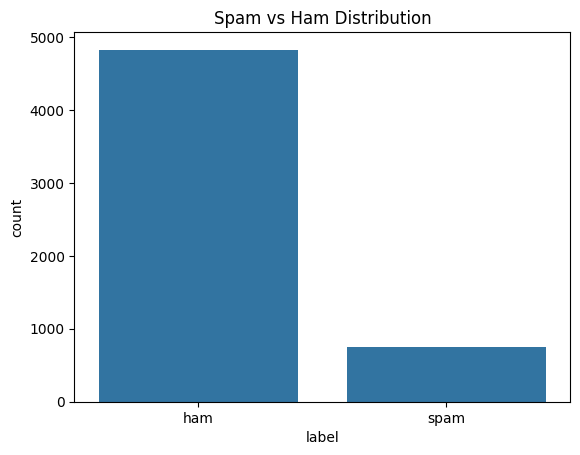

In [5]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()


In [6]:
df.isnull().sum()


,0
label,0
message,0


In [7]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])

y = df['label']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



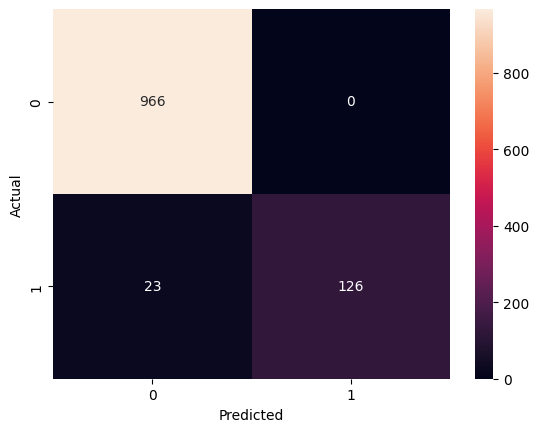

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
def predict_message(msg):
    msg_vector = vectorizer.transform([msg])
    prediction = model.predict(msg_vector)

    if prediction[0] == 1:
        result = "Spam"
    else:
        result = "Ham"

    print("Input Message:", msg)
    print("Prediction:", result)


In [16]:
predict_message("Congratulations! You won a free mobile recharge")


Input Message: Congratulations! You won a free mobile recharge
Prediction: Spam


In [14]:
import joblib

joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']